<a href="https://colab.research.google.com/github/Saiamruta21/CodingRaja/blob/main/Coding_Raja_Task_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saiamrutatulluri","key":"2ccc5e98ea9366873d960d28645bd04d"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                          Student Performance Factors                          94KB  2024-09-02 10:53:57           5499        123  1.0              
hanaksoy/customer-purchasing-behaviors                           Customer Purchasing Behaviors                         1KB  2024-09-01 22:18:07           3391         47  1.0              
haseebindata/student-performance-predictions                     Student Performance Predictions                       9KB  2024-08-17 06:57:57          11417        243  0.9411765        
computingvictor/2024-academic-ranking-of-world-universi

In [ ]:
!kaggle datasets download -d trolukovich/food11-image-dataset

Dataset URL: https://www.kaggle.com/datasets/trolukovich/food11-image-dataset
License(s): CC0-1.0
100% 1.08G/1.08G [00:09<00:00, 208MB/s]
100% 1.08G/1.08G [00:09<00:00, 118MB/s]


In [ ]:
!unzip food11-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: training/Soup/223.jpg   
  inflating: training/Soup/224.jpg   
  inflating: training/Soup/225.jpg   
  inflating: training/Soup/226.jpg   
  inflating: training/Soup/227.jpg   
  inflating: training/Soup/228.jpg   
  inflating: training/Soup/229.jpg   
  inflating: training/Soup/23.jpg    
  inflating: training/Soup/230.jpg   
  inflating: training/Soup/231.jpg   
  inflating: training/Soup/232.jpg   
  inflating: training/Soup/233.jpg   
  inflating: training/Soup/234.jpg   
  inflating: training/Soup/235.jpg   
  inflating: training/Soup/236.jpg   
  inflating: training/Soup/237.jpg   
  inflating: training/Soup/238.jpg   
  inflating: training/Soup/239.jpg   
  inflating: training/Soup/24.jpg    
  inflating: training/Soup/240.jpg   
  inflating: training/Soup/241.jpg   
  inflating: training/Soup/242.jpg   
  inflating: training/Soup/243.jpg   
  inflating: training/Soup/244.jpg   
  inflating: training/Soup/245.jpg   

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os
import pandas as pd
def create_data(path):
    label = []
    data = []
    folder = os.listdir(path)
    for i in folder:
        folder_path = os.path.join(path, i)
        folder_list = os.listdir(folder_path)
        for file in folder_list:
            file_path = os.path.join(folder_path, file)
            label.append(i)
            data.append(file_path)
    data_path = pd.Series(data, name='filepath')
    label = pd.Series(label, name='label')
    return pd.concat([data_path, label], axis=1)
def load_data():
    training_path = os.path.join('/content/training')
    validation_path = os.path.join('/content/validation')
    evaluation_path = os.path.join('/content/evaluation')
    train_data = create_data(training_path)
    val_data = create_data(validation_path)
    eval_data = create_data(evaluation_path)
    return train_data, val_data, eval_data
train_data, val_data, eval_data = load_data()
train_data.head()

filepath          label
0  /content/training/Noodles-Pasta/122.jpg  Noodles-Pasta
1  /content/training/Noodles-Pasta/400.jpg  Noodles-Pasta
2  /content/training/Noodles-Pasta/412.jpg  Noodles-Pasta
3  /content/training/Noodles-Pasta/279.jpg  Noodles-Pasta
4  /content/training/Noodles-Pasta/395.jpg  Noodles-Pasta

In [ ]:
print(train_data.shape)

(9866, 2)


In [ ]:
print(val_data.shape)

(3430, 2)


In [ ]:
print(eval_data.shape)

(3347, 2)


In [ ]:
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [ ]:
image_size = 128
image_channel = 3
bat_size = 32

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range = 15, horizontal_flip = True, zoom_range = 0.2, shear_range = 0.1, fill_mode = 'reflect', width_shift_range = 0.1, height_shift_range = 0.1)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(train_data, x_col= 'filepath', y_col= 'label', batch_size = bat_size, target_size = (image_size,image_size))
val_generator = test_datagen.flow_from_dataframe(val_data, x_col= 'filepath', y_col= 'label', batch_size = bat_size, target_size = (image_size,image_size), shuffle=False)
test_generator = test_datagen.flow_from_dataframe(eval_data, x_col= 'filepath', y_col= 'label',batch_size = bat_size, target_size = (image_size,image_size), shuffle=False)

Found 9866 validated image filenames belonging to 11 classes.
Found 3430 validated image filenames belonging to 11 classes.
Found 3347 validated image filenames belonging to 11 classes.


In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}
print("Classes present in datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Classes present in datasets

0 : Bread
1 : Dairy product
2 : Dessert
3 : Egg
4 : Fried food
5 : Meat
6 : Noodles-Pasta
7 : Rice
8 : Seafood
9 : Soup
10 : Vegetable-Fruit


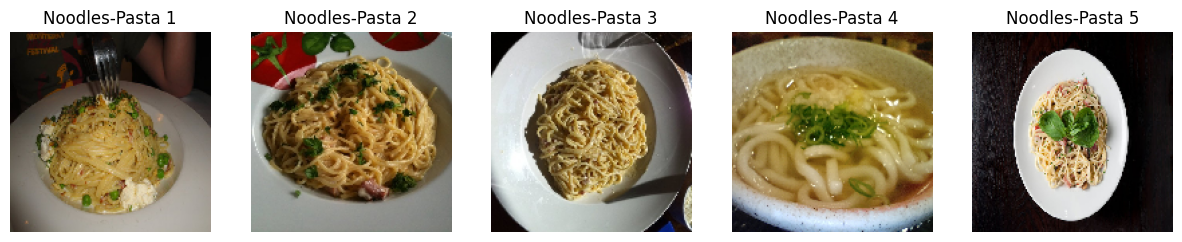

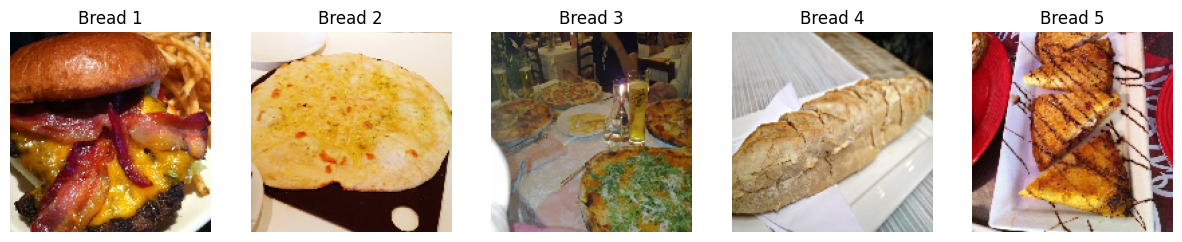

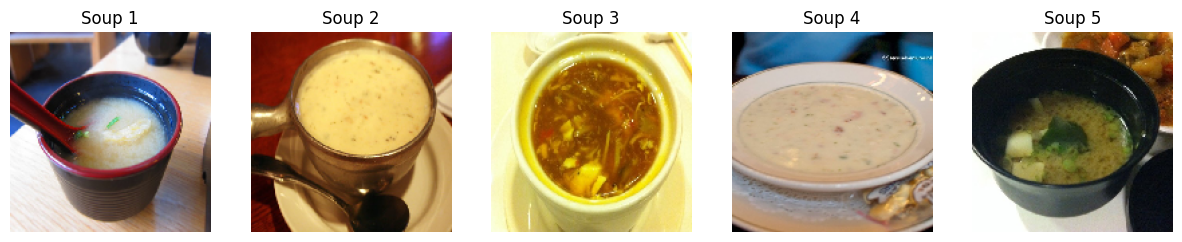

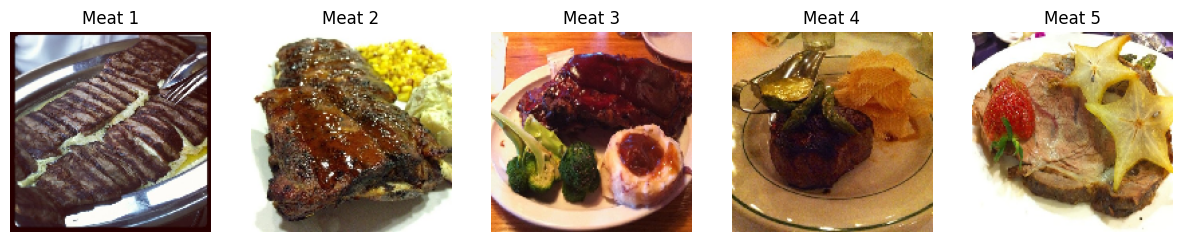

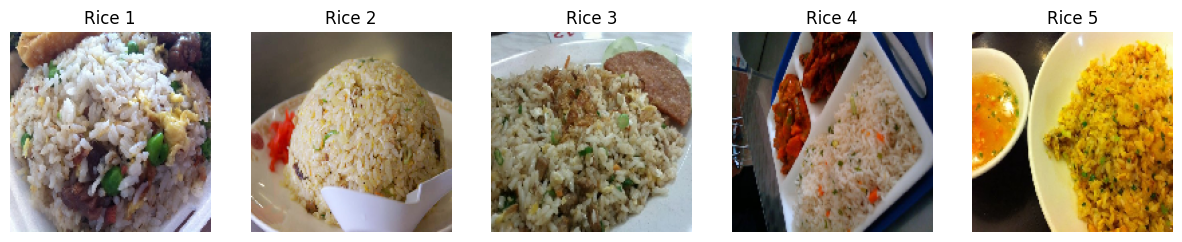

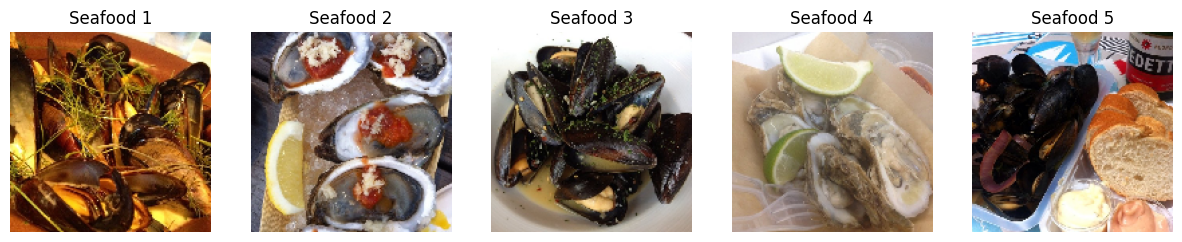

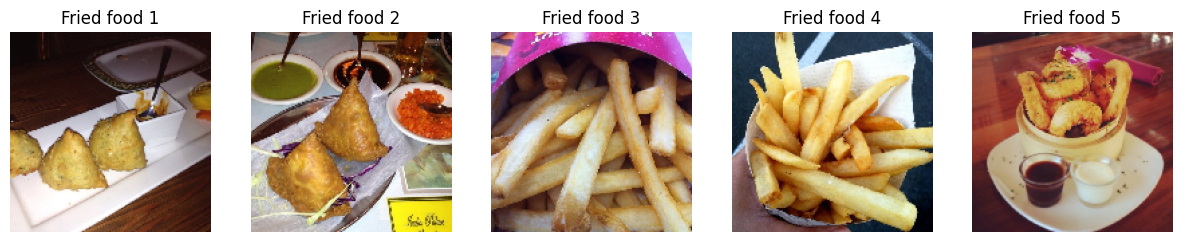

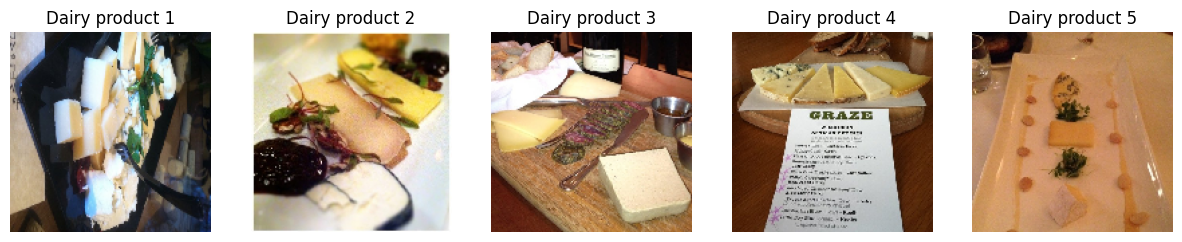

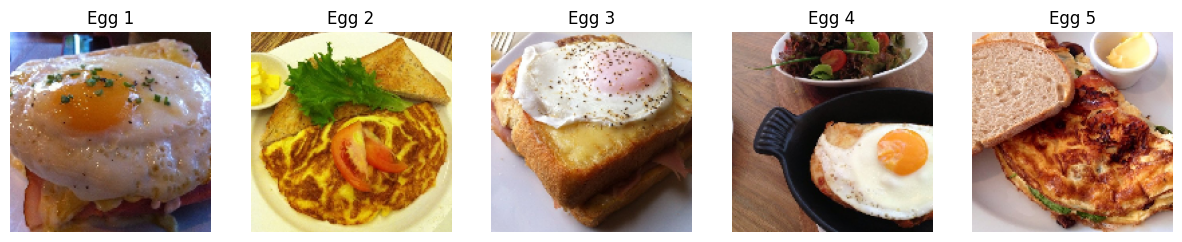

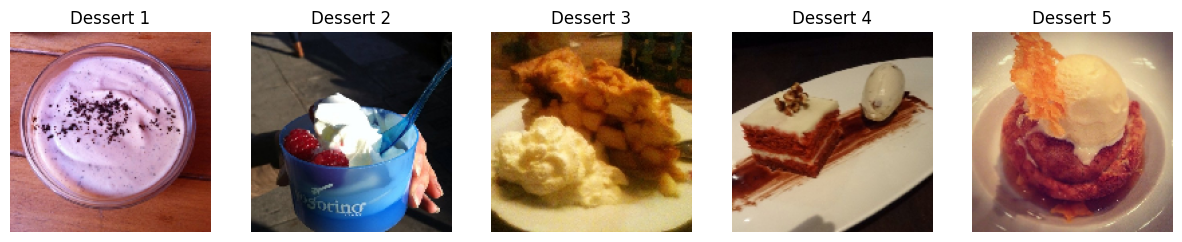

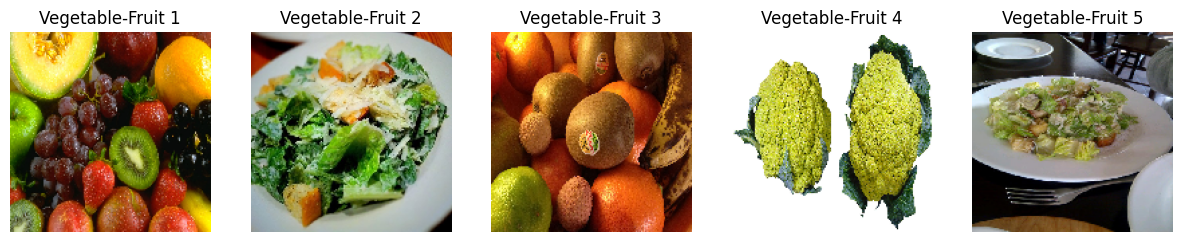

In [ ]:
!pip install keras
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
def display_images_by_class(parent_folder, n_images=5):
    class_folders = [f for f in os.listdir(parent_folder) if os.path.isdir(os.path.join(parent_folder, f))]
    for class_folder in class_folders:
        class_path = os.path.join(parent_folder, class_folder)
        images = os.listdir(class_path)[:n_images]
        plt.figure(figsize=(15, 10))
        for i, img_name in enumerate(images):
            img = load_img(os.path.join(class_path, img_name), target_size=(150, 150))
            plt.subplot(1, n_images, i + 1)
            plt.imshow(img)
            plt.title(f"{class_folder} {i+1}")
            plt.axis('off')
        plt.show()
parent_folder = '/content/training'
display_images_by_class(parent_folder, n_images=5)

In [ ]:
!pip install efficientnet
import efficientnet.tfkeras as efn
base_model = efn.EfficientNetB7(input_shape=(224,224,3), weights='imagenet', include_top=False)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.9 MB/s eta 0:00:00
258434480/258434480 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x)
x=Dense(64,activation='relu')(x)
out=Dense(11,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=out)
base_model.trainable = False

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
ES = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
RL = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

In [ ]:
base_model = efn.EfficientNetB7(input_shape=(128,128,3), weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(64, activation='relu')(x)
out = Dense(11, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=out)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_generator,epochs=1,validation_data=val_generator, callbacks=[ES,RL])

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 43/309 ━━━━━━━━━━━━━━━━━━━━ 1:40:22 23s/step - accuracy: 0.2070 - loss: 2.2612

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
loss,acc = model.evaluate(train_generator,batch_size = 32, verbose = 0)
print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)
loss,acc = model.evaluate(test_generator,batch_size = 32, verbose = 0)
print('The accuracy of the model for test data is:',acc*100)
print('The Loss of the model for test data is:',loss)

In [ ]:
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

In [ ]:
cf_mtx = confusion_matrix(y_true, y_pred)
group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(11, 11)
plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(), cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [ ]:
def display_images_with_predictions(generator, y_pred, num_images_to_display=10):
    labels = {v: k for k, v in generator.class_indices.items()}
    filenames = generator.filenames
    fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 4))
    for i in range(num_images_to_display):
        image_path = os.path.join(generator.directory, filenames[i])
        image = plt.imread(image_path)
        predicted_label_idx = int(y_pred[i])
        predicted_label = labels[predicted_label_idx]
        axes[i].imshow(image)
        axes[i].set_title(f"Pred: {predicted_label}")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()
display_images_with_predictions(train_generator, y_pred, num_images_to_display=10)